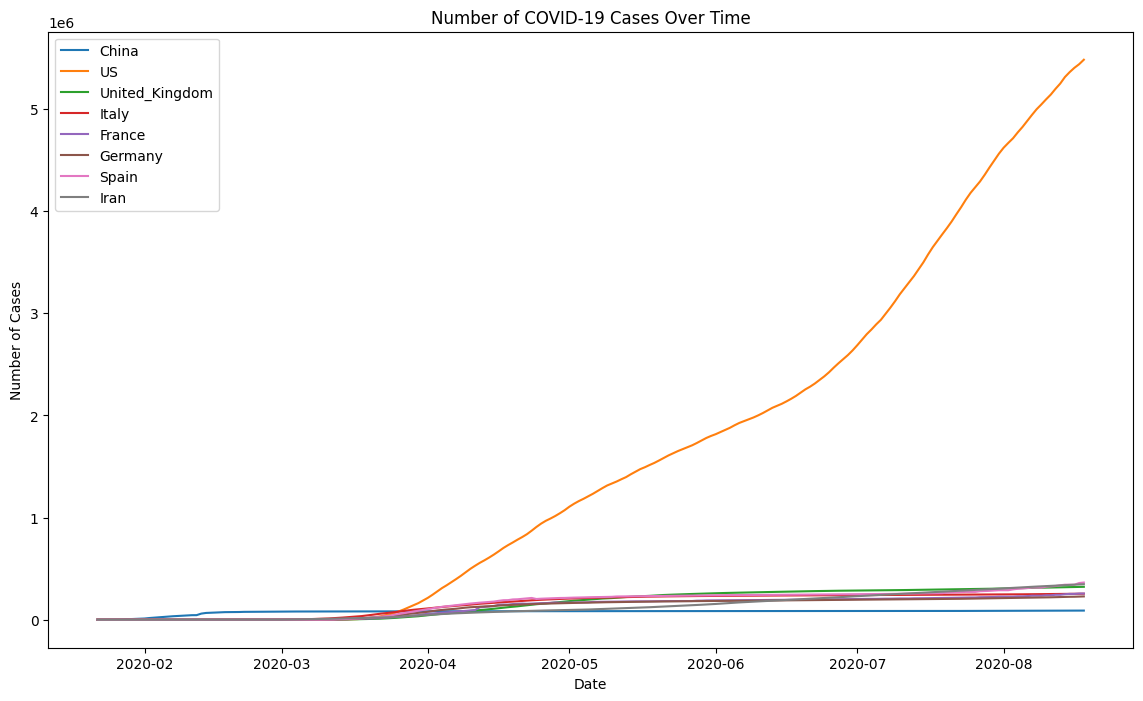

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/key-countries-pivoted_csv.csv')
# Chuyển đổi cột Date sang kiểu dữ liệu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ biểu đồ số ca nhiễm theo thời gian cho từng quốc gia
for country in data.columns[1:]:
    plt.plot(data['Date'], data[country], label=country)

# Thiết lập tiêu đề và nhãn trục
plt.title('Number of COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [13]:
# Tính toán tỉ lệ tăng trưởng hàng ngày
growth_rate = data.set_index('Date').pct_change().dropna()

# Hiển thị vài dòng đầu của dữ liệu tỉ lệ tăng trưởng
growth_rate.head()

,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
Date,,,,,,,,
2020-02-19,0.005498,0.000000,0.052632,0.000000,0.0,0.0,0.0,inf
2020-02-20,0.006138,0.000000,0.100000,0.000000,0.0,0.0,0.0,1.500000
2020-02-21,0.006300,0.153846,0.045455,5.666667,0.0,0.0,0.0,2.600000
2020-02-22,0.019206,0.000000,0.000000,2.100000,0.0,0.0,0.0,0.555556
2020-02-23,0.000273,0.000000,0.217391,1.500000,0.0,0.0,0.0,0.535714


In [16]:
# Giả sử file_path chứa đường dẫn đến tệp dữ liệu chi tiết về bệnh nhân
file_path_detailed = '/content/drive/MyDrive/Colab Notebooks/key-countries-pivoted_csv.csv'
patient_data = pd.read_csv(file_path_detailed)

# Hiển thị vài dòng đầu của dữ liệu bệnh nhân
patient_data.head()

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,548,1,0,0,0,0,0,0
1,2020-01-23,643,1,0,0,0,0,0,0
2,2020-01-24,920,2,0,0,2,0,0,0
3,2020-01-25,1406,2,0,0,3,0,0,0
4,2020-01-26,2075,5,0,0,3,0,0,0


In [17]:
patient_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/key-countries-pivoted_csv.csv')
if 'Gender' in patient_data.columns:
  # Kiểm tra và xử lý các giá trị bị thiếu
  patient_data = patient_data.dropna()
  # Chuyển đổi các giá trị categorical thành số nếu cần
  patient_data['Gender'] = patient_data['Gender'].map({'Male': 1, 'Female': 0})
  patient_data['Outcome'] = patient_data['Outcome'].map({'Recovered': 1, 'Deceased': 0})
else:
  print("Column 'Gender' does not exist in the DataFrame.")

# Hiển thị thông tin tổng quan sau khi xử lý
patient_data.info()

Column 'Gender' does not exist in the DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            210 non-null    object
 1   China           210 non-null    int64 
 2   US              210 non-null    int64 
 3   United_Kingdom  210 non-null    int64 
 4   Italy           210 non-null    int64 
 5   France          210 non-null    int64 
 6   Germany         210 non-null    int64 
 7   Spain           210 non-null    int64 
 8   Iran            210 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 14.9+ KB


In [21]:
# Thống kê mô tả cơ bản
print(patient_data.describe())

# Biểu đồ phân phối tuổi theo kết quả điều trị
if 'Age' in patient_data.columns:
    # Plot histogram using seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(data=patient_data, x='Age', hue='Outcome', multiple='stack')
    plt.title('Age Distribution by Outcome')
    plt.xlabel('Age')
    plt.show()
else:
    print("'Age' column not found in DataFrame.")

# Biểu đồ phân phối CT Score
if 'CT_Score' in patient_data.columns:
    # Plot histogram using seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(data=patient_data, x='CT_Score', hue='Outcome', multiple='stack')
    plt.title('CT Score Distribution by Outcome')
    plt.xlabel('CT Score')
    plt.show()
else:
    print("'CT_Score' column not found in DataFrame.")

# Biểu đồ tương quan giữa tuổi và CT Score
if 'Age' in patient_data.columns and 'CT_Score' in patient_data.columns:
    # Plot scatter plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=patient_data, x='Age', y='CT_Score', hue='Outcome')
    plt.title('Age vs CT Score by Outcome')
    plt.xlabel('Age')
    plt.ylabel('CT Score')
    plt.show()
else:
    print("'Age' or 'CT_Score' columns not found in DataFrame.")

              China            US  United_Kingdom          Italy  \
count    210.000000  2.100000e+02      210.000000     210.000000   
mean   76560.223810  1.587296e+06   160020.338095  153567.280952   
std    20838.491861  1.647966e+06   126683.942217  101998.267221   
min      548.000000  1.000000e+00        0.000000       0.000000   
25%    80983.500000  2.894500e+03     2744.750000   22054.500000   
50%    83969.000000  1.220899e+06   198698.000000  213735.000000   
75%    84738.500000  2.499583e+06   283626.500000  240092.250000   
max    89494.000000  5.482416e+06   322177.000000  254636.000000   

              France        Germany          Spain           Iran  
count     210.000000     210.000000     210.000000     210.000000  
mean   125742.828571  123006.361905  163579.314286  125910.490476  
std     91765.182215   85763.224059  116009.705252  111440.308990  
min         0.000000       0.000000       0.000000       0.000000  
25%      4505.000000    4887.500000    6742.750

In [23]:
required_columns = ['Age', 'Gender', 'CT_Score']
missing_columns = [col for col in required_columns if col not in patient_data.columns]

if missing_columns:
    print(f"Columns {missing_columns} not found in DataFrame.")
else:
    # Prepare X and y for logistic regression
    X = patient_data[['Age', 'Gender', 'CT_Score']]
    y = patient_data['Outcome']

    # Example logistic regression model (replace with your actual modeling process)
    model = LogisticRegression()
    model.fit(X, y)
    print("Logistic Regression model trained successfully.")

Columns ['Age', 'Gender', 'CT_Score'] not found in DataFrame.
